In [1]:
# Import packages
import numpy as np
from tqdm import tqdm

np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

curDay = 17

In [2]:
# Load input into workspace
filename = f'inputs\\day{curDay}.txt'

inputFile = open(filename)
inputs = [s for s in inputFile.read().splitlines()]

print('Done loading input')

# Load test-input into workspace
filenameTest = f'inputs\\day{curDay}_test.txt'

inputFileTest = open(filenameTest)
inputsTest = [s for s in inputFileTest.read().splitlines()]

print('Done loading test-input') 

Done loading input
Done loading test-input


# Part 1

Idé: pathfinding/breadthfirst/A*, men hvor der i den den del der finder nabo bliver holdt styr på de tre forrige

evt 3d?

# Start by implementing breadth first as test

In [3]:
curIn = inputs.copy()
curIn = inputsTest.copy()

curMap = []
for li in curIn:
    curMap.append([int(x) for x in list(li)])
curMap = np.array(curMap)

curMapFull = []
for li in inputs:
    curMapFull.append([int(x) for x in list(li)])
curMapFull = np.array(curMapFull)

In [4]:
startP = (0,0)
# curMap[startP[1]][startP[0]]

In [5]:
testMap = np.ones(curMap.shape )
testMap[5:,4] = 99
testMap[5:,9] = 99
testMap[:-2,7] = 99
# testMap

In [6]:
# Simply neighbour function

curH,curW = curMap.shape
def getNeighSimple(p):
    # print(curMap[p[1]][p[0]])
    # print(p)
    x,y = p 
    toReturn = []
    if x > 0:
        toReturn.append((x-1,y))
    if x < (curW-1):
        toReturn.append((x+1,y))
    if y > 0:
        toReturn.append((x,y-1))
    if y < (curH-1):
        toReturn.append((x,y+1))

    return toReturn

# getNeighSimple(startP)
# getNeighSimple((0,2))

# curMap[1][12]

In [7]:
from queue import PriorityQueue

front = PriorityQueue()
front.put((0,startP))

# front.get()
print(len(front.queue))

1


In [8]:
### Movement cost (Dijkstra's)
front = PriorityQueue()
front.put((0,startP))
cameFrom = dict()
cameFrom[startP] = -1
costSoFar = dict()
costSoFar[startP] = 0 




while len(front.queue) > 0:
    # print(front)
    curCost,curP = front.get()
    # print(curP)
    
    newNeigh = getNeighSimple(curP)
    for next in newNeigh:
        
        # newCost = costSoFar[curP] + 1
        # newCost = curCost + 1
        mapCost = int(curMap[next[1]][next[0]])
        # mapCost = int(testMap[next[1]][next[0]])
        newCost = curCost + mapCost

        # print(next,next in cameFrom)
        # if next not in cameFrom:

        if (next not in costSoFar) or (newCost < costSoFar[next]):
            costSoFar[next] = newCost
            # front.append(next)
            front.put((newCost,next))
            cameFrom[next] = curP
            # cameFrom.append(next)

### Attempt at considering it a higher dimensional problem... 

"Past-move" dimension

3 chars of past moves, e.g. "WSE".

In "EEE" 'dimension', no E move is possible. 

In [9]:
curIn = inputs.copy()
# curIn = inputsTest.copy()

curMap = []
for li in curIn:
    curMap.append([int(x) for x in list(li)])
curMap = np.array(curMap)

curMapFull = []
for li in inputs:
    curMapFull.append([int(x) for x in list(li)])
curMapFull = np.array(curMapFull)

In [10]:
startP = (0,0,'NNN')



In [11]:
# # Neighbour function
# curH,curW = curMap.shape
# def getNeigh(p):
#     # print(p)
#     x,y,preDir = p 

#     toReturn = []

#     # newDir = preDir[1:]
#     if preDir != 'WWW':
#         if x > 0:
#             newDir = preDir[1:] + 'W'
#             toReturn.append((x-1,y , newDir))
#     if preDir != 'EEE':
#         if x < (curW-1):
#             newDir = preDir[1:] + 'E'
#             toReturn.append((x+1,y , newDir))
#     if preDir != 'NNN':
#         if y > 0:
#             newDir = preDir[1:] + 'N'
#             toReturn.append((x,y-1 , newDir))
#     if preDir != 'SSS':
#         if y < (curH-1):
#             newDir = preDir[1:] + 'S'
#             toReturn.append((x,y+1 , newDir))

#     return toReturn

# getNeigh(startP)
# # getNeigh((3,3,'EES'))

In [12]:
# Neighbour function, with no reversing
curH,curW = curMap.shape
def getNeigh(p):
    # print(p)
    x,y,preDir = p 

    toReturn = []

    # newDir = preDir[1:]
    if (preDir != 'WWW') & (preDir[-1] != 'E'):
        if x > 0:
            newDir = preDir[1:] + 'W'
            toReturn.append((x-1,y , newDir))
    if (preDir != 'EEE') & (preDir[-1] != 'W'):
        if x < (curW-1):
            newDir = preDir[1:] + 'E'
            toReturn.append((x+1,y , newDir))
    if (preDir != 'NNN') & (preDir[-1] != 'S'):
        if y > 0:
            newDir = preDir[1:] + 'N'
            toReturn.append((x,y-1 , newDir))
    if (preDir != 'SSS') & (preDir[-1] != 'N'):
        if y < (curH-1):
            newDir = preDir[1:] + 'S'
            toReturn.append((x,y+1 , newDir))

    return toReturn

getNeigh(startP)
# getNeigh((3,3,'EES'))

[(1, 0, 'NNE')]

In [13]:
### Movement cost (Dijkstra's)
front = PriorityQueue()
front.put((0,startP))
cameFrom = dict()
cameFrom[startP] = 0
costSoFar = dict()
costSoFar[startP] = 0 




while len(front.queue) > 0:
    # print(front)
    curCost,curP = front.get()
    # print(curP)
    
    newNeigh = getNeigh(curP)
    for next in newNeigh:
        
        # newCost = costSoFar[curP] + 1
        # newCost = curCost + 1
        mapCost = int(curMap[next[1]][next[0]])
        # mapCost = int(testMap[next[1]][next[0]])
        newCost = curCost + mapCost

        # print(next,next in cameFrom)
        # if next not in cameFrom:

        if (next not in costSoFar) or (newCost < costSoFar[next]):
            costSoFar[next] = newCost
            # front.append(next)
            front.put((newCost,next))
            cameFrom[next] = curP
            # cameFrom.append(next)

In [14]:
for curP in costSoFar:
    x,y,curDir = curP 
    if x == (curW-1):
        if y == (curH-1):
            print(curP,costSoFar[curP])

(140, 140, 'SSS') 855
(140, 140, 'ESE') 857
(140, 140, 'SEE') 857
(140, 140, 'EEE') 857
(140, 140, 'SSE') 857
(140, 140, 'EES') 857
(140, 140, 'ESS') 857
(140, 140, 'SES') 857
(140, 140, 'WSE') 859
(140, 140, 'NES') 861


# Part 2

Should be possible to solve with other rules for which moves to allow?

In [15]:

# Load test-input into workspace
filenameTest2 = f'inputs\\day{curDay}_test2.txt'

inputFileTest2 = open(filenameTest2)
inputsTest2 = [s for s in inputFileTest2.read().splitlines()]

print('Done loading test-input 2') 

Done loading test-input 2


In [16]:
curIn = inputs.copy()
# curIn = inputsTest.copy()
# curIn = inputsTest2.copy()

curMap = []
for li in curIn:
    curMap.append([int(x) for x in list(li)])
curMap = np.array(curMap)

curMapFull = []
for li in inputs:
    curMapFull.append([int(x) for x in list(li)])
curMapFull = np.array(curMapFull)

In [43]:
# Neighbour function, with no reversing
curH,curW = curMap.shape
def getNeigh2(p):
    # print(p)
    x,y,preDir = p 

    toReturn = []

    # newDir = preDir[1:]
    # if (preDir != 'WWW') & (preDir[-1] != 'E') :
    if (
        ((preDir[-4:] == 'NNNN') or (preDir[-4:] == 'SSSS') or (preDir[-1] == 'W')) # Only turning west after 4 N or 4 S (or continuing west)
        and (preDir[-10:] != 'W'*10) # No more than ten consecutive blocks
        and (preDir[-1] != 'E') # No reversing
        ):
        if x > 0:
            newDir = preDir[1:] + 'W'
            toReturn.append((x-1,y , newDir))
    # if (preDir != 'EEE') & (preDir[-1] != 'W'):
    if (
        ((preDir[-4:] == 'NNNN') or (preDir[-4:] == 'SSSS') or (preDir[-1] == 'E')) # Only turning west after 4 N or 4 S (or continuing west)
        and (preDir[-10:] != 'E'*10) # No more than ten consecutive blocks
        and (preDir[-1] != 'W') # No reversing
        ):
        if x < (curW-1):
            newDir = preDir[1:] + 'E'
            toReturn.append((x+1,y , newDir))
    # if (preDir != 'NNN') & (preDir[-1] != 'S'):
    if (
        ((preDir[-4:] == 'WWWW') or (preDir[-4:] == 'EEEE') or (preDir[-1] == 'N')) # Only turning west after 4 N or 4 S (or continuing west)
        and (preDir[-10:] != 'N'*10) # No more than ten consecutive blocks
        and (preDir[-1] != 'S') # No reversing
        ):
        if y > 0:
            newDir = preDir[1:] + 'N'
            toReturn.append((x,y-1 , newDir))
    # if (preDir != 'SSS') & (preDir[-1] != 'N'):
    if (
        ((preDir[-4:] == 'WWWW') or (preDir[-4:] == 'EEEE') or (preDir[-1] == 'S')) # Only turning west after 4 N or 4 S (or continuing west)
        and (preDir[-10:] != 'S'*10) # No more than ten consecutive blocks
        and (preDir[-1] != 'N') # No reversing
        ):
        if y < (curH-1):
            # print(y)
            newDir = preDir[1:] + 'S'
            toReturn.append((x,y+1 , newDir))

    return toReturn


startP = (0,0,'WWWWWWSSSS')
startP = (0,0,'WWWWWWNNNNN')
startP = (0,0,'RRRRRRREEEE')
# startP = (0,0,'RRRRRRRRNNNNN')
# startP = (0,0,'RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRNNNNN')
getNeigh2(startP)
# getNeigh((3,3,'EES'))

[(1, 0, 'RRRRRREEEEE'), (0, 1, 'RRRRRREEEES')]

### Note that it makes a difference whether that start-position ends with SSSS or EEEE. 
Best solutions starts with moving down a lot. So ending with a bunch of S's won't work (since it will be too many in south), with 'N' also won't work (since it cannot reverse). Too few E's would also not allows it to turn South

An improved implemention would manage turning in a smarter way than "were the last four in another direction"... But this works ¯\\\_(ツ)\_/¯

In [44]:
curDir[-10:]

'WWWWWWSSSS'

In [45]:
### Movement cost (Dijkstra's)
front = PriorityQueue()
front.put((0,startP))
cameFrom = dict()
cameFrom[startP] = 0
costSoFar = dict()
costSoFar[startP] = 0 




while len(front.queue) > 0:
    # print(front)
    curCost,curP = front.get()
    # print(curP)
    
    newNeigh = getNeigh2(curP)
    # print(newNeigh)
    for next in newNeigh:
        
        # newCost = costSoFar[curP] + 1
        # newCost = curCost + 1
        mapCost = int(curMap[next[1]][next[0]])
        # mapCost = int(testMap[next[1]][next[0]])
        newCost = curCost + mapCost

        # print(next,next in cameFrom)
        # if next not in cameFrom:

        if (next not in costSoFar) or (newCost < costSoFar[next]):
            costSoFar[next] = newCost
            # front.append(next)
            front.put((newCost,next))
            cameFrom[next] = curP
            # cameFrom.append(next)
            
            x,y,curDir = next 
            if x == (curW-1):
                if y == (curH-1):
                    if (curDir[-4:]=='NNNN' or curDir[-4:]=='WWWW' or curDir[-4:]=='EEEE' or curDir[-4:]=='SSSS'):
                        print(next,costSoFar[next])

(140, 140, 'SEEEEEEEEEE') 980
(140, 140, 'SSEEEEEEEEE') 980
(140, 140, 'EEESSSSSSSS') 981
(140, 140, 'SSSSEEEEEEE') 983
(140, 140, 'SSSEEEEEEEE') 983
(140, 140, 'EESSSSEEEEE') 984
(140, 140, 'EESSSSSSSSS') 984
(140, 140, 'ESSSSSSSSSS') 984
(140, 140, 'EEESSSSEEEE') 985
(140, 140, 'EESSSSSEEEE') 985
(140, 140, 'ESSSSSEEEEE') 985
(140, 140, 'EEEESSSSSSS') 985
(140, 140, 'ESSSSEEEEEE') 986
(140, 140, 'SSSSSEEEEEE') 987
(140, 140, 'SEEEESSSSSS') 987
(140, 140, 'EEEEEEESSSS') 989
(140, 140, 'NNNEEEESSSS') 990
(140, 140, 'EEEEESSSSSS') 990
(140, 140, 'NNEEEEESSSS') 991
(140, 140, 'EEEEEESSSSS') 992
(140, 140, 'SSSSSSEEEEE') 993
(140, 140, 'SSSSSSSEEEE') 994
(140, 140, 'NEEEEEESSSS') 995
(140, 140, 'SSEEEESSSSS') 996
(140, 140, 'SSSEEEESSSS') 996
(140, 140, 'ESSSSSSEEEE') 997
(140, 140, 'WWWSSSSEEEE') 997
(140, 140, 'NNEEEESSSSS') 997
(140, 140, 'SEEEEESSSSS') 997
(140, 140, 'NEEEEESSSSS') 1000
(140, 140, 'NEEEESSSSSS') 1000
(140, 140, 'SEEEEEESSSS') 1000
(140, 140, 'WSSSSSSEEEE') 1001
(140, 

In [50]:
sol2 = 0
for curP in costSoFar:
    x,y,curDir = curP 
    if x == (curW-1):
        if y == (curH-1):
            if (curDir[-4:]=='NNNN' or curDir[-4:]=='WWWW' or curDir[-4:]=='EEEE' or curDir[-4:]=='SSSS'):
                sol2 = costSoFar[curP]

                break
                # print(curP,costSoFar[curP])
print(f'Solution to part 2: {sol2}')

Solution to part 2: 980


# Old stuff and tests below

In [ ]:
asdfasdf

In [52]:
reachedGoal = []
for curP in costSoFar:
    x,y,curDir = curP 
    if x == (curW-1):
        if y == (curH-1):
            reachedGoal.append(curP)

In [53]:
allCosts = [costSoFar[x] for x in reachedGoal]


curP = reachedGoal[0]

x = curP[0]
y = curP[1]

curRoute = ''

allX = [] 
allY = []
while (x != 0) or (y != 0):
    curP = cameFrom[curP]
    x,y,curDir = curP 
    # print(curP)
    curRoute = curP[2][-1] + curRoute
    allX.append(x)
    allY.append(y)
curRoute

'ESSSSSSSSEEEESSSSSSSSSSEEEESSSSSSSSSSEEEESSSSSWWWWSSSSSSSWWWWSSSSSSSSSSWWWWSSSSSSSSSEEEESSSSSSEEEESSSSSSSSSWWWWSSSSSSSSSSWWWWSSSSSSSSSSEEEESSSSSSSSSSEEEESSSSSSEEEESSSSSSSSSSEEEEEESSSSSSSEEEEEEEESSSSEEEEEEESSSSSEEEEEEEEEESSSSEEEEEEENNNNEEEEEEEEEESSSSEEEEEEEEEENNNNEEEEEESSSSEEEEEEEEEENNNNEEEEEESSSSEEEEEEEENNNNEEEEEEEEENNNNEEEEENNNNEEEEEEESSSSEEEEESSSSEEEESSSSEEEEEEEEE'

(-10.0, 10.0)

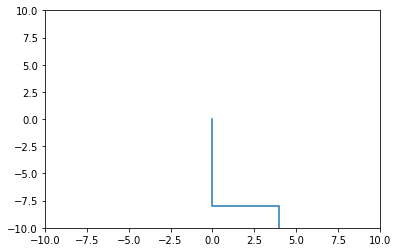

In [57]:
# allX[::-1]
# allY[::-1]

import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(allX,[-x for x in allY])

ax.set_xlim([-10,10])
ax.set_ylim([-10,10])

In [20]:
# curP = (12,12,'SSSSSSSSS')
# cameFrom[cameFrom[cameFrom[curP]]]
# while curP != (0,0):
#     print(curP)
#     curP = cameFrom[curP]

In [21]:
# 

In [48]:
for curP in costSoFar:
    x,y,curDir = curP 
    if x == (curW-1):
        if y == (curH-1):
            if (curDir[-4:]=='NNNN' or curDir[-4:]=='WWWW' or curDir[-4:]=='EEEE' or curDir[-4:]=='SSSS'):
                print(curP,costSoFar[curP])
                
                # preP = cameFrom[curP]
                # x2,y2,preDir = preP
                # print(preDir,costSoFar[preP])
                # while (x2 != 0) or (y2 != 0):
                #     preP = cameFrom[preP]
                #     x2,y2,preDir = preP
                #     print(x2,y2,preDir,costSoFar[preP])
                
            # print(curDir[-4:]=='NNNN' or curDir[-4:]=='WWWW' or curDir[-4:]=='EEEE' or curDir[-4:]=='SSSS')

(140, 140, 'EEEEESSSSSSSS') 984
(140, 140, 'SEEEESSSSSSSS') 984
(140, 140, 'EEESSSSSSSSSS') 987
(140, 140, 'EEEESSSSSSSSS') 987
(140, 140, 'SSEEEESSSSSSS') 988
(140, 140, 'SEEEEESSSSSSS') 989
(140, 140, 'SSSEEEESSSSSS') 990
(140, 140, 'SSSSEEEEEEEEE') 991
(140, 140, 'SSSEEEEEEEEEE') 991
(140, 140, 'SSEEEEESSSSSS') 993
(140, 140, 'EESSSSEEEEEEE') 994
(140, 140, 'ESSSSEEEEEEEE') 994
(140, 140, 'EEEESSSSEEEEE') 995
(140, 140, 'EEEEESSSSEEEE') 996
(140, 140, 'EEEESSSSSEEEE') 996
(140, 140, 'EEESSSSSEEEEE') 996
(140, 140, 'EEESSSSEEEEEE') 997
(140, 140, 'EESSSSSEEEEEE') 998
(140, 140, 'ESSSSSEEEEEEE') 998
(140, 140, 'SSSSSEEEEEEEE') 998
(140, 140, 'SSSSEEEESSSSS') 999
(140, 140, 'SSSSSEEEESSSS') 999
(140, 140, 'SSSSSSEEEEEEE') 1000
(140, 140, 'SWWWWSSSSEEEE') 1000
(140, 140, 'EEEEEEEEESSSS') 1000
(140, 140, 'SEEEEEEESSSSS') 1000
(140, 140, 'SSSEEEEESSSSS') 1000
(140, 140, 'ENNNNEEEESSSS') 1001
(140, 140, 'EEEEEEESSSSSS') 1001
(140, 140, 'EEESSSSSSEEEE') 1002
(140, 140, 'ESSSSSSSSEEEE') 1002

In [49]:
# 43 not correct
# Also not 45

# 981 is too high
# Just for fun, tested with 980, and it was correct...

In [50]:
# # curMap

# ------
# ------
# ------
# ------



In [51]:
# curP = (12,12)
# while curP != (0,0):
#     print(curP)
#     curP = cameFrom[curP]

# Test and other stuff below

In [52]:
# import matplotlib.pyplot as plt 

# fig,ax = plt.subplots()
# # ax.imshow(testMap,origin='upper')
# ax.imshow(curMap,origin='upper')
# # curP = (curW-1,curH-1,'EES')
# curP = (curW-1,curH-1,'SSS')
# curP = (11, 4, 'EEESSSSEEEE')
# while curP != startP:
#     # print(curP)
#     prevP = curP 
#     x2,y2,preDir = prevP 
    
#     curP = cameFrom[curP]
#     x,y,curDir = curP
#     # ax.plot(x,y,'*')
#     ax.plot([x,x2],[y,y2],'r')
    
# ax.grid(True)

In [53]:
# curP = (12,12,'SSE')
# x,y,curDir = cameFrom[curP]

# curP = (12,12,'SSE')
# x = 12
# y = 12
# while curP != startP:


#     # prevP = curP 
#     print(curP)
#     curP = cameFrom[curP]
#     x,y,curDir = curP

In [54]:

curP = (curW-1,curH-1,'SSS')
curP = (140, 140, 'EEESSSSSSSS')

(100.0, 141.0)

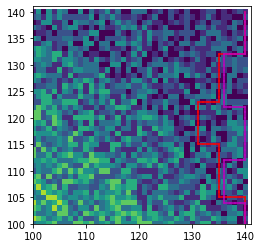

In [56]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots()
# ax.imshow(testMap,origin='upper')
ax.imshow(curMap,origin='upper')
# curP = (curW-1,curH-1,'EES')
curP = (curW-1,curH-1,'SSS')
curP = (140, 140, 'EEESSSSSSSS')
curP = (140, 140, 'EEESSSSSSSS')
curP = (140, 140, 'EEEEESSSSSSSS')
while curP != startP:
    # print(curP)
    prevP = curP 
    x2,y2,preDir = prevP 
    
    curP = cameFrom[curP]
    x,y,curDir = curP
    # ax.plot(x,y,'*')
    ax.plot([x,x2],[y,y2],'r')
    
curP = (140, 140, 'SEEEEEEEEEE')
curP = (140, 140, 'EEESSSSSSSS')
curP = (140, 140, 'EESSSSSSSSS')
curP = (140, 140, 'SEEEESSSSSSSS')
while curP != startP:
    # print(curP)
    prevP = curP 
    x2,y2,preDir = prevP 
    
    curP = cameFrom[curP]
    x,y,curDir = curP
    # ax.plot(x,y,'*')
    ax.plot([x,x2],[y,y2],'m')

ax.set_xlim([100,141])    
ax.set_ylim([100,141])    

In [ ]:
cameFrom

{(0, 0, 'WWWWWWSSSSS'): -1,
 (1, 0, 'WWWWWSSSSSE'): (0, 0, 'WWWWWWSSSSS'),
 (0, 1, 'WWWWWSSSSSS'): (0, 0, 'WWWWWWSSSSS'),
 (2, 0, 'WWWWSSSSSEE'): (1, 0, 'WWWWWSSSSSE'),
 (1, 1, 'WWWWSSSSSSE'): (0, 1, 'WWWWWSSSSSS'),
 (0, 2, 'WWWWSSSSSSS'): (0, 1, 'WWWWWSSSSSS'),
 (1, 2, 'WWWSSSSSSSE'): (0, 2, 'WWWWSSSSSSS'),
 (0, 3, 'WWWSSSSSSSS'): (0, 2, 'WWWWSSSSSSS'),
 (2, 1, 'WWWSSSSSSEE'): (1, 1, 'WWWWSSSSSSE'),
 (1, 3, 'WWSSSSSSSSE'): (0, 3, 'WWWSSSSSSSS'),
 (0, 4, 'WWSSSSSSSSS'): (0, 3, 'WWWSSSSSSSS'),
 (3, 0, 'WWWSSSSSEEE'): (2, 0, 'WWWWSSSSSEE'),
 (3, 1, 'WWSSSSSSEEE'): (2, 1, 'WWWSSSSSSEE'),
 (1, 4, 'WSSSSSSSSSE'): (0, 4, 'WWSSSSSSSSS'),
 (0, 5, 'WSSSSSSSSSS'): (0, 4, 'WWSSSSSSSSS'),
 (2, 2, 'WWSSSSSSSEE'): (1, 2, 'WWWSSSSSSSE'),
 (2, 3, 'WSSSSSSSSEE'): (1, 3, 'WWSSSSSSSSE'),
 (3, 2, 'WSSSSSSSEEE'): (2, 2, 'WWSSSSSSSEE'),
 (4, 0, 'WWSSSSSEEEE'): (3, 0, 'WWWSSSSSEEE'),
 (4, 1, 'WSSSSSSEEEE'): (3, 1, 'WWSSSSSSEEE'),
 (1, 5, 'SSSSSSSSSSE'): (0, 5, 'WSSSSSSSSSS'),
 (2, 4, 'SSSSSSSSSEE'): (1, 4, '

In [ ]:

# fig,ax = plt.subplots(figsize=(16,16))
# ax.imshow(curMapFull,origin='upper')

In [ ]:
### Basic breadth first 
front = []
front.append(startP)
cameFrom = dict()
cameFrom[startP] = 0


while len(front) > 0:
    # print(front)
    curP = front.pop(0)
    
    newNeigh = getNeigh(curP)
    for next in newNeigh:
        # print(next,next in cameFrom)
        if next not in cameFrom:
            front.append(next)
            cameFrom[next] = curP
            # cameFrom.append(next)

In [ ]:
# curP = (12,12)
# while curP != (0,0):
#     print(curP)
#     curP = cameFrom[curP]

(12, 12)
(11, 12)
(11, 11)
(11, 10)
(11, 9)
(11, 8)
(11, 7)
(11, 6)
(11, 5)
(11, 4)
(11, 3)
(11, 2)
(11, 1)
(11, 0)
(10, 0)
(9, 0)
(8, 0)
(7, 0)
(6, 0)
(5, 0)
(4, 0)
(3, 0)
(2, 0)
(1, 0)
